<a href="https://colab.research.google.com/github/Gtpimenta/covid19_timeseries_analysis/blob/main/analise_covid19_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Descrição

Análise de séries temporais a partir dos dados da evolução da pandemia de COVID-19 no Brasil durante o ano de 2020, com foco no estado de São Paulo.

# Parte 2: Análise Inicial

Importação de bibliotecas:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from datetime import date

Carregamento dos dados:

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv')

Informações gerais sobre os dados:

In [ ]:
dados.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [ ]:
dados.shape

(3962, 18)

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
semana,3962.0,21.226148,5.881463,9.00000,16.000000,21.000000,26.000000,3.100000e+01
novosObitos,3962.0,46.808682,154.192181,-37.00000,1.000000,8.000000,29.000000,1.508000e+03
Obitos,3962.0,2177.584048,8262.953107,0.00000,17.000000,215.000000,1105.750000,9.272800e+04
novosCasos,3962.0,1348.031802,4870.369469,-290.00000,34.000000,268.000000,987.500000,6.615000e+04
Casos,3962.0,50626.981323,203912.319539,1.00000,502.000000,6959.000000,35712.750000,2.670451e+06
obitosMS,3962.0,2170.086320,8241.976490,0.00000,16.000000,211.000000,1100.750000,9.247500e+04
casosMS,3962.0,50383.553761,203149.675080,0.00000,482.250000,6878.500000,35589.500000,2.662485e+06
obitos_por_100k,3962.0,14.933156,20.209664,0.00000,0.367572,4.350970,23.551752,8.468686e+01
casos_por_100k,3962.0,478.668401,740.377339,0.00048,9.149610,127.740300,694.728198,5.401965e+03
obitos_por_casos,3962.0,0.035083,0.026418,0.00000,0.019182,0.029885,0.045503,2.222200e-01


# Parte 3: Análise gráfica da evolução do número de óbitos por estado

Removendo os dados referente a soma dos estados:

In [ ]:
dados_estados = dados.query('estado != "TOTAL"')

In [ ]:
dados_estados.data = pd.to_datetime(dados_estados.data)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dados_estados.dtypes

semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

In [ ]:
dados_estados.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [ ]:
sns.set_style('darkgrid')

Visualização do crescimento do número de óbitos por estado em função do tempo:

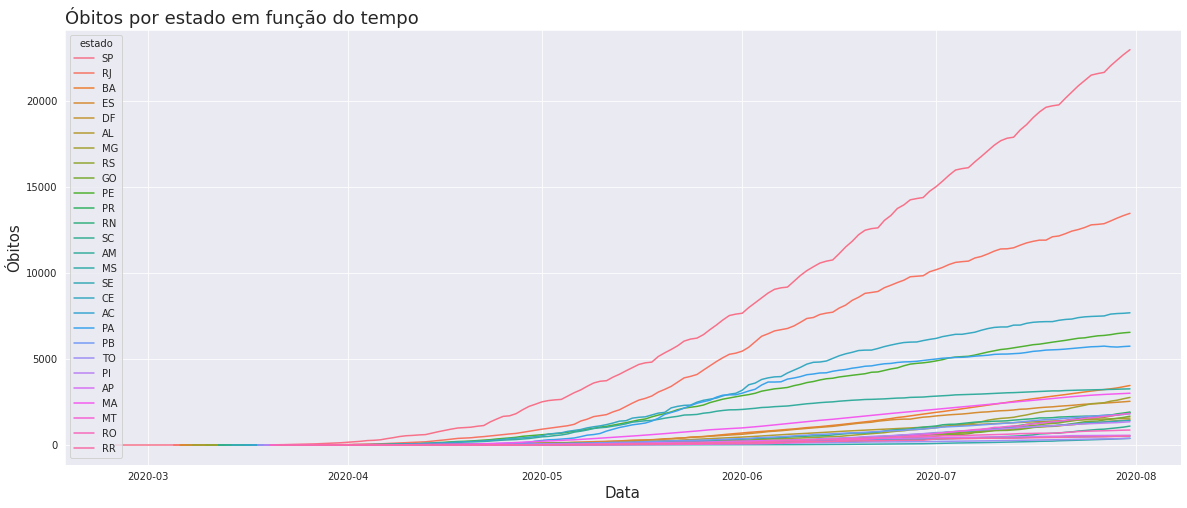

In [ ]:
ax = sns.lineplot(x = 'data', y = 'Obitos', data = dados_estados, hue = 'estado')
ax.figure.set_size_inches(20, 8)
ax.set_title('Óbitos por estado em função do tempo', loc = 'left', fontsize = 18)
ax.set_xlabel('Data', fontsize = 15)
ax.set_ylabel('Óbitos', fontsize = 15)
ax = ax

Analisando o gráfico, é notável um crescimento semelhante a uma curva exponencial. Para poder confirmar essa hipótese, é feita a transformação do eixo Y para a escala logarítmica:

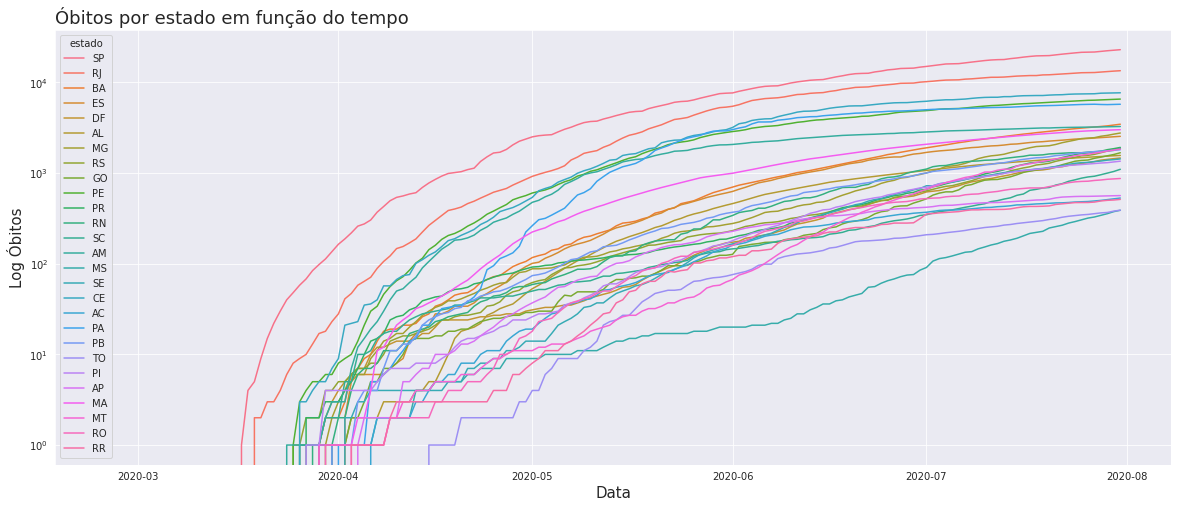

In [ ]:
ax = sns.lineplot(x = 'data', y = 'Obitos', data = dados_estados, hue = 'estado')
ax.figure.set_size_inches(20, 8)
ax.set_title('Óbitos por estado em função do tempo', loc = 'left', fontsize = 18)
ax.set_xlabel('Data', fontsize = 15)
ax.set_ylabel('Log Óbitos', fontsize = 15)
ax.set_yscale('log')
ax = ax

Com esse comportamento da curva na escala logarítmica, é possível confirmar a hipótese de que se trata de um crescimento exponencial. Sendo assim, seguimos para a análise do estado de São Paulo, onde houve um crescimento mais acentuado.

# Parte 4: Análise da evolução da pandemia de COVID-19 em São Paulo ao longo de 2020

## 4.1 Número de óbitos:

> Selecionando somente os dados de São Paulo:

In [ ]:
dados_sp = dados_estados.query('estado == "SP"')

In [ ]:
dados_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


> Visualização do crescimento do número de óbitos nas duas escalas (como feito anteriormente para todos os estados):

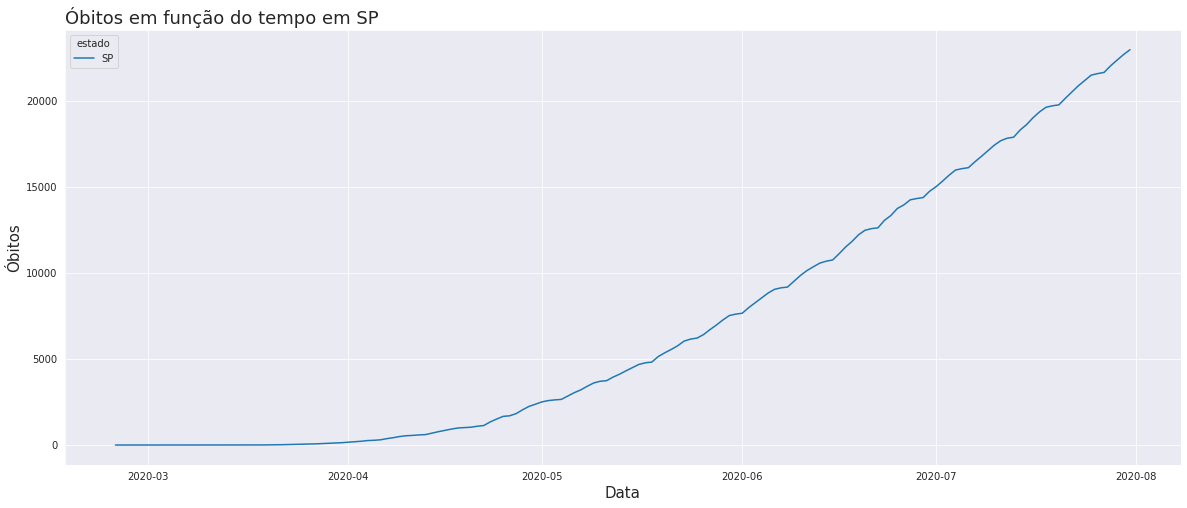

In [ ]:
ax = sns.lineplot(x = 'data', y = 'Obitos', data = dados_sp, hue = 'estado')
ax.figure.set_size_inches(20, 8)
ax.set_title('Óbitos em função do tempo em SP', loc = 'left', fontsize = 18)
ax.set_xlabel('Data', fontsize = 15)
ax.set_ylabel('Óbitos', fontsize = 15)
ax = ax

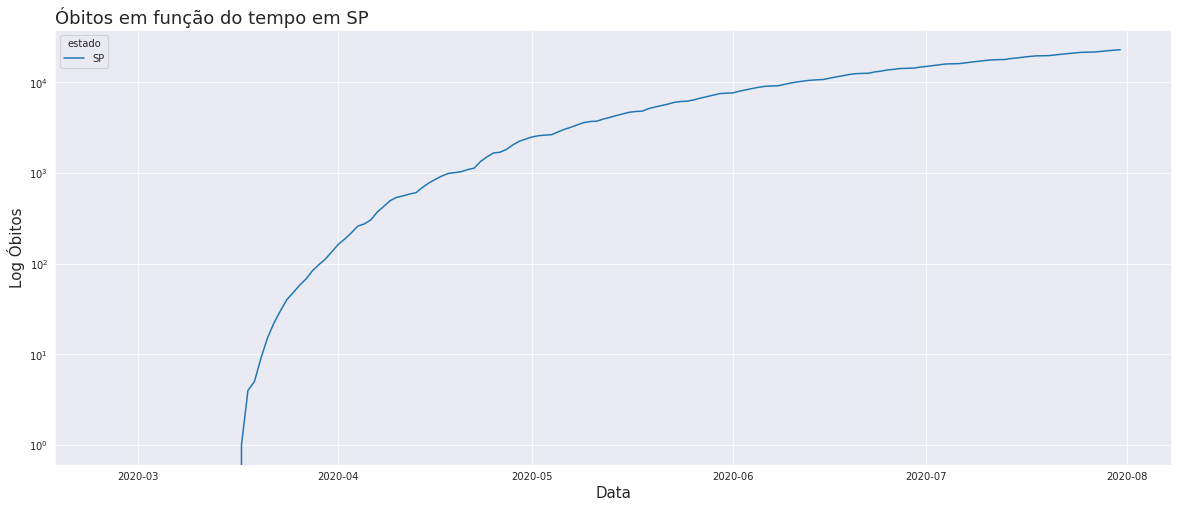

In [ ]:
ax = sns.lineplot(x = 'data', y = 'Obitos', data = dados_sp, hue = 'estado')
ax.figure.set_size_inches(20, 8)
ax.set_title('Óbitos em função do tempo em SP', loc = 'left', fontsize = 18)
ax.set_xlabel('Data', fontsize = 15)
ax.set_ylabel('Log Óbitos', fontsize = 15)
ax.set_yscale('log')
ax = ax

In [ ]:
def linha_tempo(var, titulo, ylabel):
  ax = sns.lineplot(x = 'data', y = var, data = dados_sp, hue = 'estado')
  ax.figure.set_size_inches(20, 8)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel('Data', fontsize = 15)
  ax.set_ylabel(ylabel, fontsize = 15)
  ax = ax

## 4.2 Número de Recuperados:

> Número de recuperados em função do tempo:

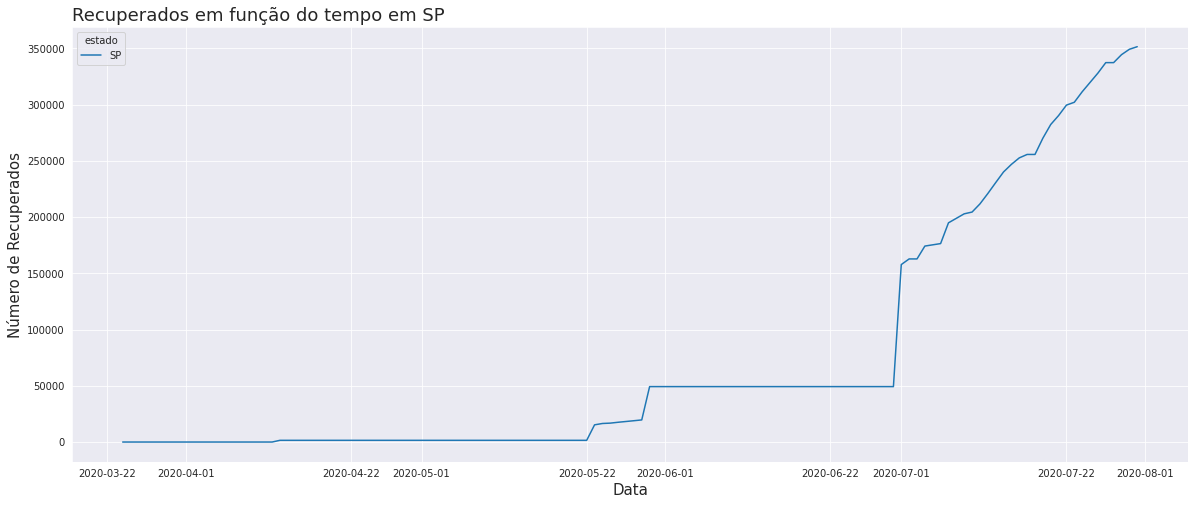

In [ ]:
linha_tempo('recuperados', 'Recuperados em função do tempo em SP', 'Número de Recuperados')

É possível notar que o número de recuperados seguia constante até um momento onde houve um degrau. Apesar de não soar natural em um primeiro momento de análise, é possível encontrar um motivo para tal. Inicialmente, os números de recuperados só eram divulgados referente aos casos graves, onde havia a internação de pacientes. A partir do momento em que começaram a contar os casos leves, no dia 01/07/2020, a soma de recuperados foi a 157 mil, explicando esse degrau no gráfico.

## 4.3: Número de Suspeitos

> Número de suspeitos em função do tempo:

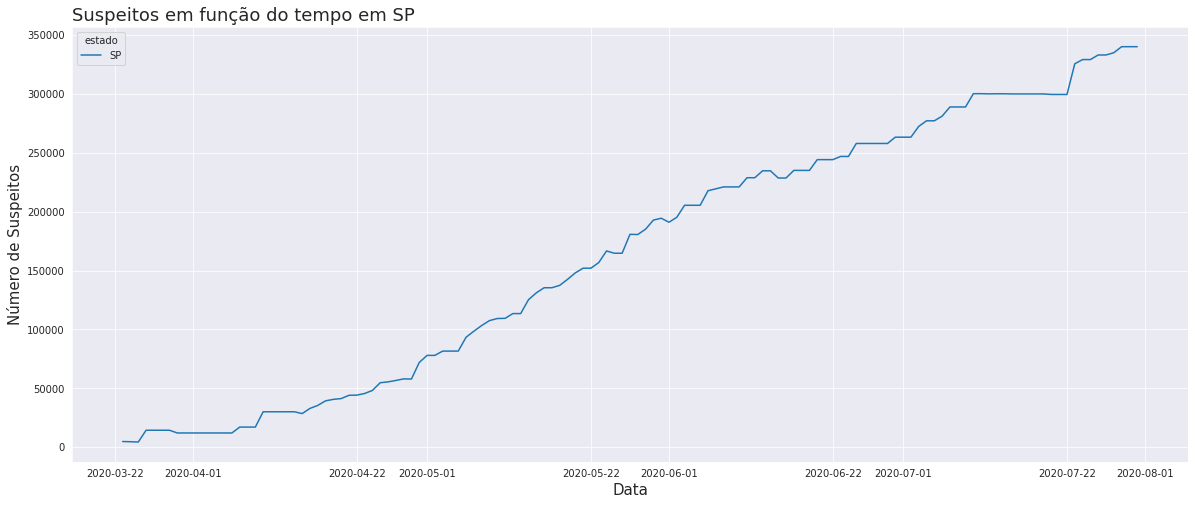

In [ ]:
linha_tempo('suspeitos', 'Suspeitos em função do tempo em SP', 'Número de Suspeitos')

## 4.4: Comparação das variáveis sobrepostas

> Sobrepondo os suspeitos, recuperados e o número de óbitos:

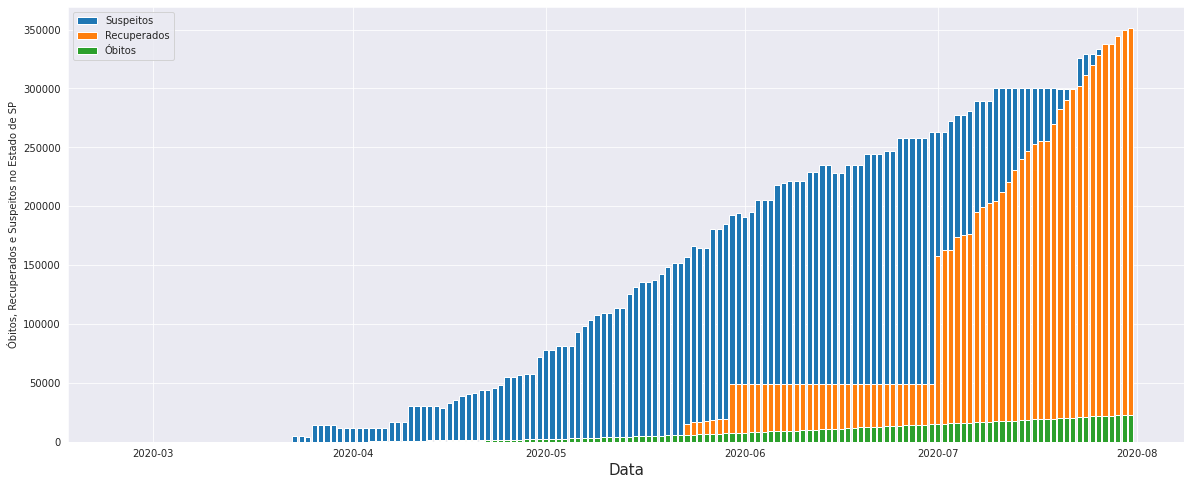

In [ ]:
plt.figure(figsize = (20,8))
fig = plt.bar(dados_sp.data, dados_sp.suspeitos, label = 'Suspeitos')
plt.bar(dados_sp.data, dados_sp.recuperados, label = 'Recuperados')
plt.bar(dados_sp.data, dados_sp.Obitos, label = 'Óbitos')
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Óbitos, Recuperados e Suspeitos no Estado de SP')
plt.legend(loc = 'upper left')

Através da sobreposição dos gráficos, é possível notar a diferença na proporção entre as três classes. Contudo, se considerarmos que na última data presente nos dados existem aproximadamente 25 mil casos e 350 mil recuperados, podemos concluir que a taxa de mortalidade estava extremamente alta (em termos percentuais).

In [ ]:
def plot_barra(x, y, dataset, titulo, xl, yl):
  plt.figure(figsize = (20,8))
  fig = plt.bar(dataset[x], dataset[y])
  plt.title(titulo, loc = 'left', fontsize = 20)
  plt.xlabel(xl, fontsize = 15)
  plt.ylabel(yl, fontsize = 15)
  plt.show()

## 4.5: Aceleração

> Novos casos no estado e sua aceleração:

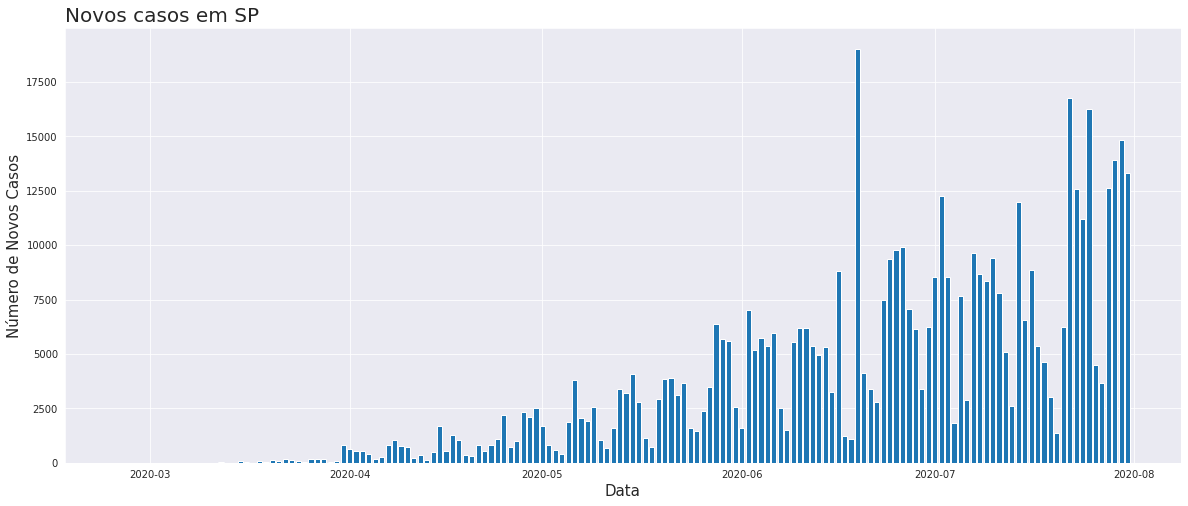

In [ ]:
plot_barra('data', 'novosCasos', dados_sp, 'Novos casos em SP', 'Data', 'Número de Novos Casos')

É curioso pensar que existe uma sazonalidade quando pensamos em novos casos, visto que não existem dias mais ou menos favoráveis para o vírus. De acordo com o gráfico, existe um ciclo de 7 dias sendo dois deles os dias com menos número de novos casos. Evidente que esses dois dias são referentes ao final de semana, mas a informação não pode ser mal interpretada: **os finais de semana não são dias de menor incidência**.

Nesse caso, podemos notar que em finais de semana os laboratórios trabalhavam sob o regime de plantão, o que também justifica um aumento significativo no primeiro dia do ciclo.

In [ ]:
dados_sp['aceleracao_casos'] = dados_sp.novosCasos.diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


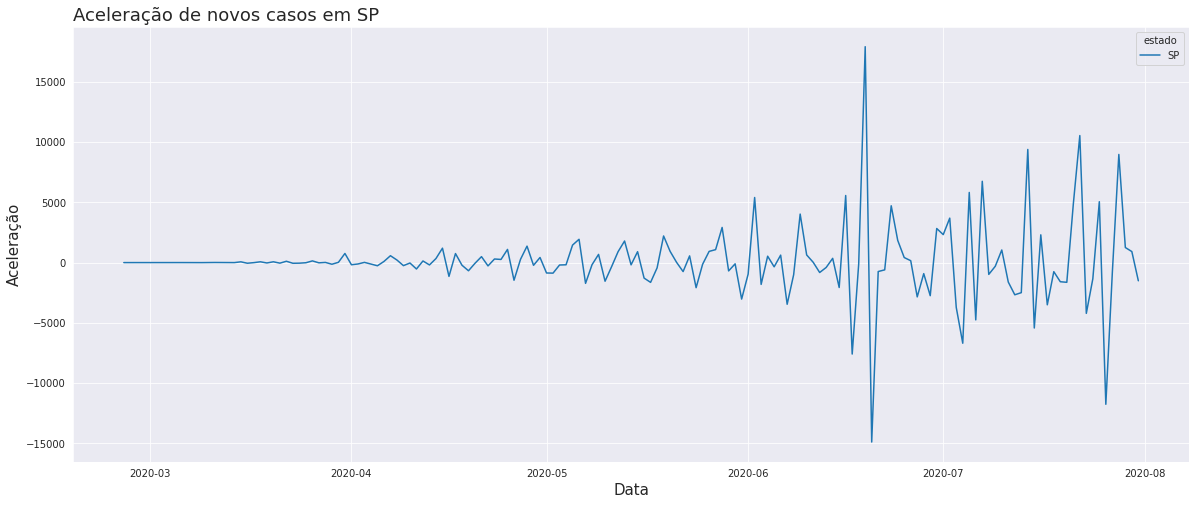

In [ ]:
linha_tempo('aceleracao_casos', 'Aceleração de novos casos em SP', 'Aceleração')

Esse comportamento é refletido na aceleração do número de novos casos. Apesar desse ruído que pode dar uma ideia em que houveram momentos em que os novos casos diminuíram. Como foi concluído anteriormente, infelizmente não é o caso aqui.

In [ ]:
dados_sp['aceleracao_obitos'] = dados_sp.novosObitos.diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracao_casos,aceleracao_obitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


> Aceleração dos novos óbitos:

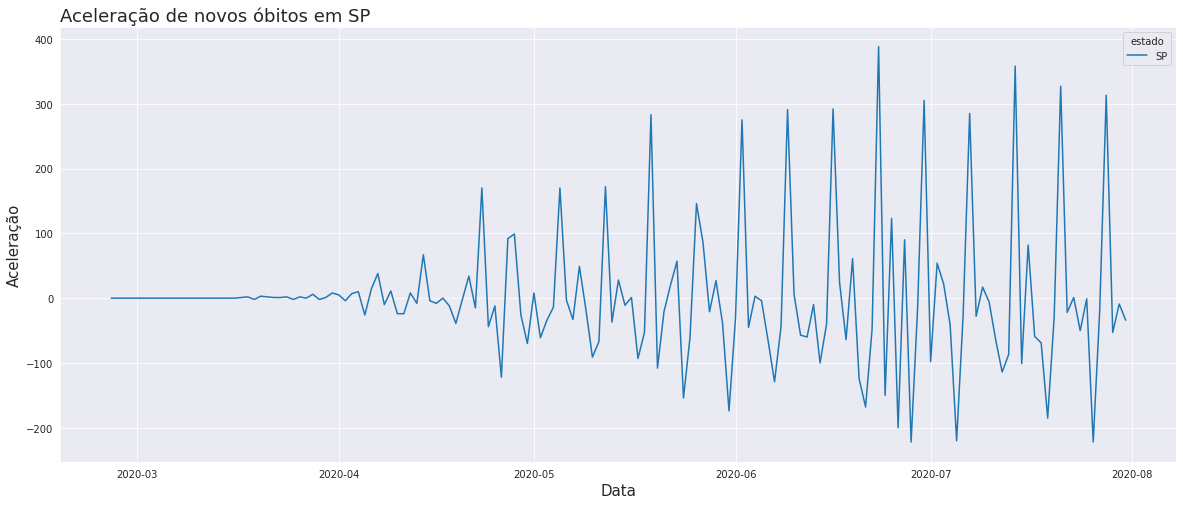

In [ ]:
linha_tempo('aceleracao_obitos', 'Aceleração de novos óbitos em SP', 'Aceleração')

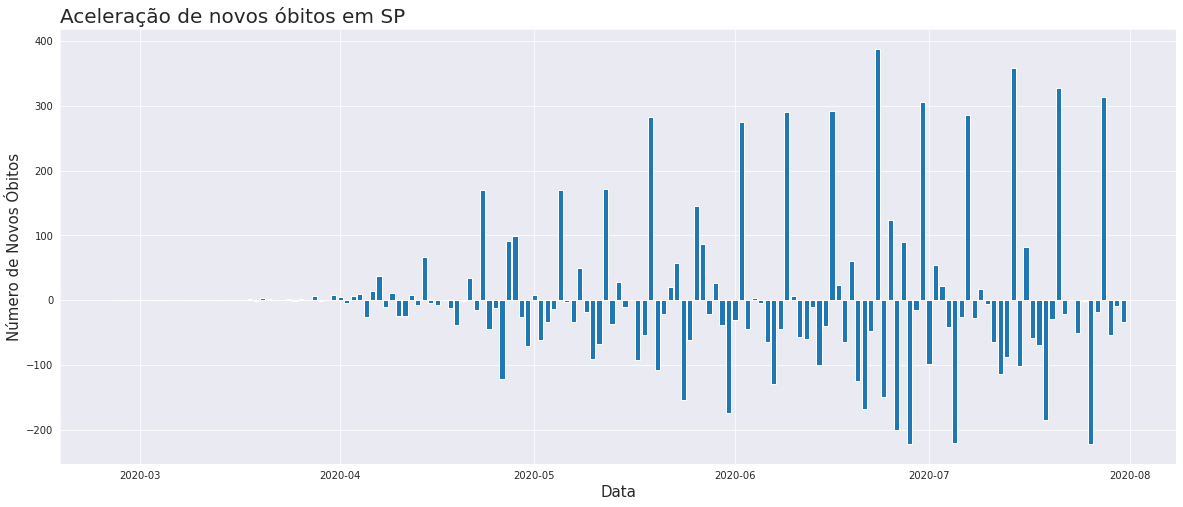

In [ ]:
plot_barra('data', 'aceleracao_obitos', dados_sp, 'Aceleração de novos óbitos em SP', 'Data', 'Número de Novos Óbitos')

In [ ]:
dados_sp['media_obitos7'] = dados_sp.novosObitos.rolling(window = 7, center = False).mean()
dados_sp['media_obitos14'] = dados_sp.novosObitos.rolling(window = 14, center = False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 4.6: Média móvel

> Comparando a média móvel do número de óbitos com o número de óbitos

Como foi visto anteriormente, a plotagem dos dados com muito ruído pode levar a uma interpretação errada, passando uma informação falsa sobre o fenômeno estudado em função do tempo. Para tal, utiliza-se a média móvel para **amenizar** esse ruído presente. No gráfico abaixo é possível compararmos a média móvel de 7 dias, 14 dias e a distribuição dos dados sem a média móvel:

<BarContainer object of 158 artists>

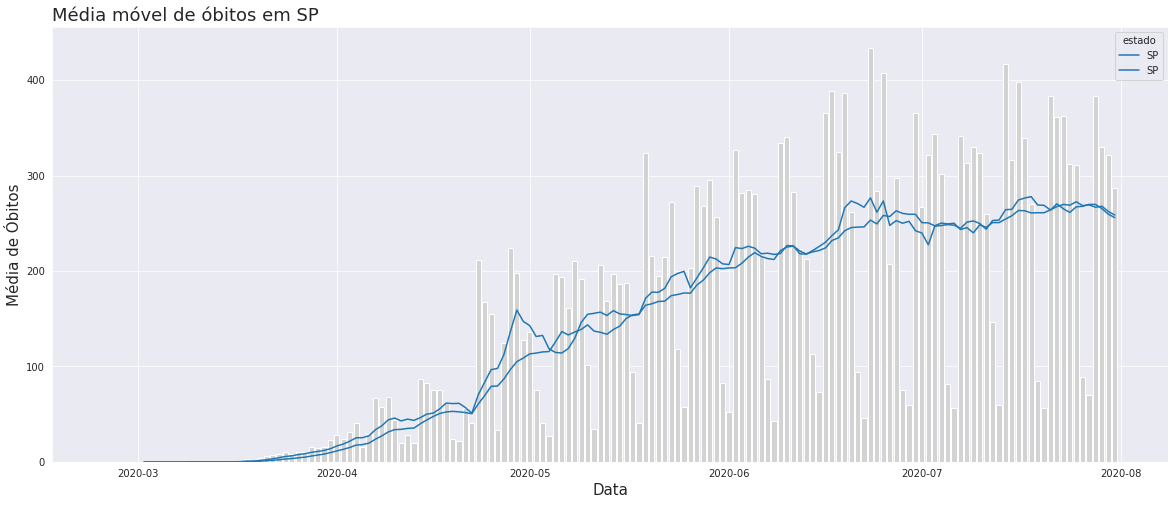

In [ ]:
linha_tempo('media_obitos7', 'Média móvel de óbitos em SP', 'Média de Óbitos')
linha_tempo('media_obitos14', 'Média móvel de óbitos em SP', 'Média de Óbitos')
plt.bar(dados_sp.data, dados_sp.novosObitos, color = 'lightgrey')

<BarContainer object of 158 artists>

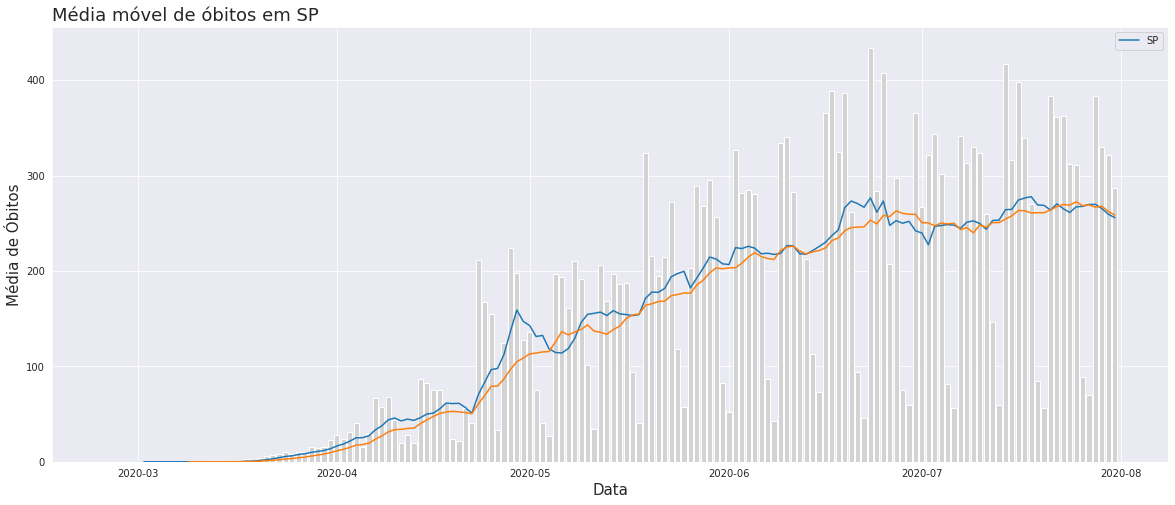

In [ ]:
linha_tempo('media_obitos7', 'Média móvel de óbitos em SP', 'Média de Óbitos')
sns.lineplot(x = 'data', y = 'media_obitos14', data = dados_sp, legend = 'auto')
plt.bar(dados_sp.data, dados_sp.novosObitos, color = 'lightgrey')

> Visualizando os componentes separadamente:

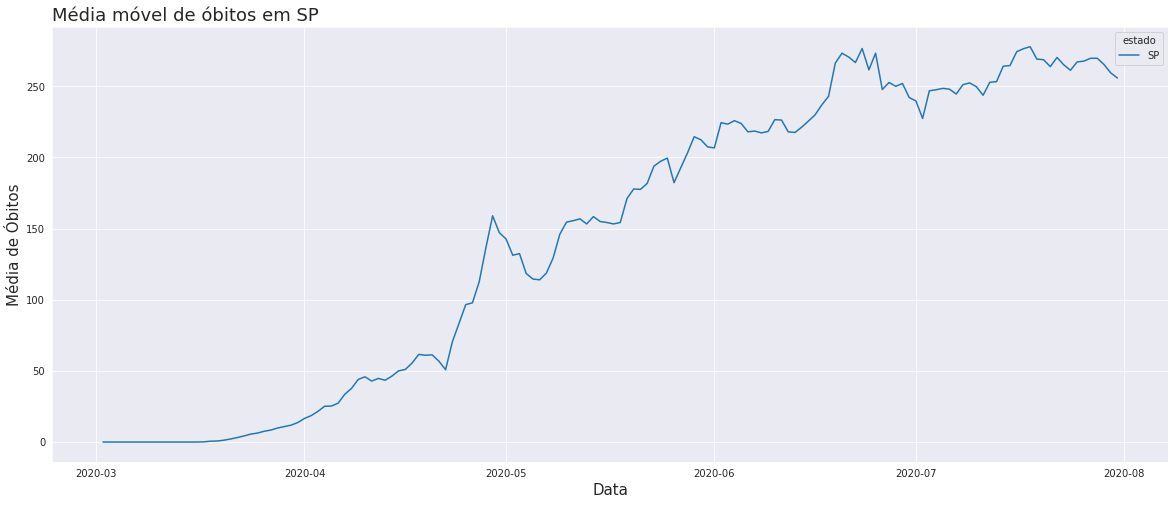

In [ ]:
linha_tempo('media_obitos7', 'Média móvel de óbitos em SP', 'Média de Óbitos')

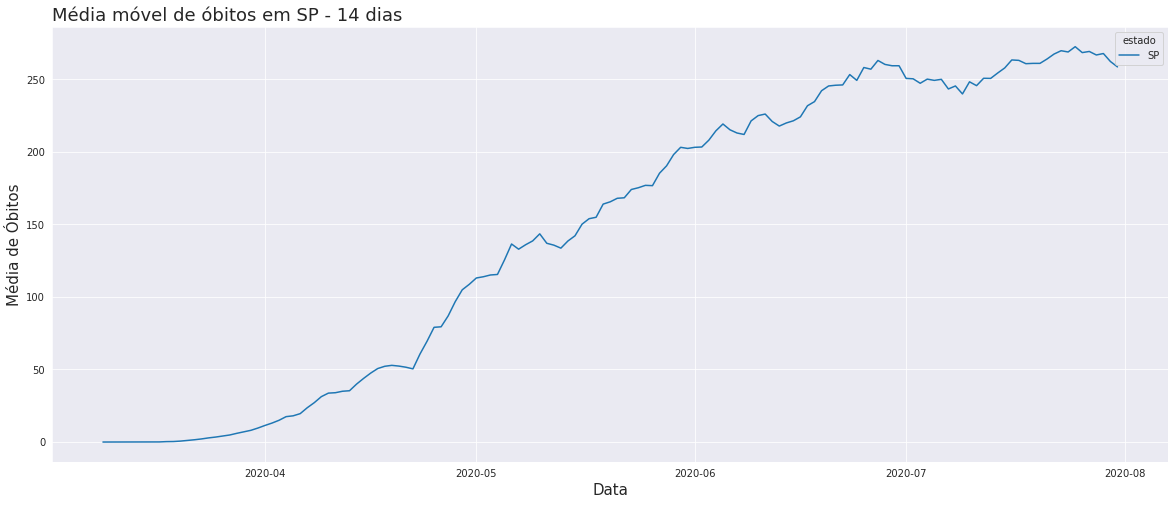

In [ ]:
linha_tempo('media_obitos14', 'Média móvel de óbitos em SP - 14 dias', 'Média de Óbitos')

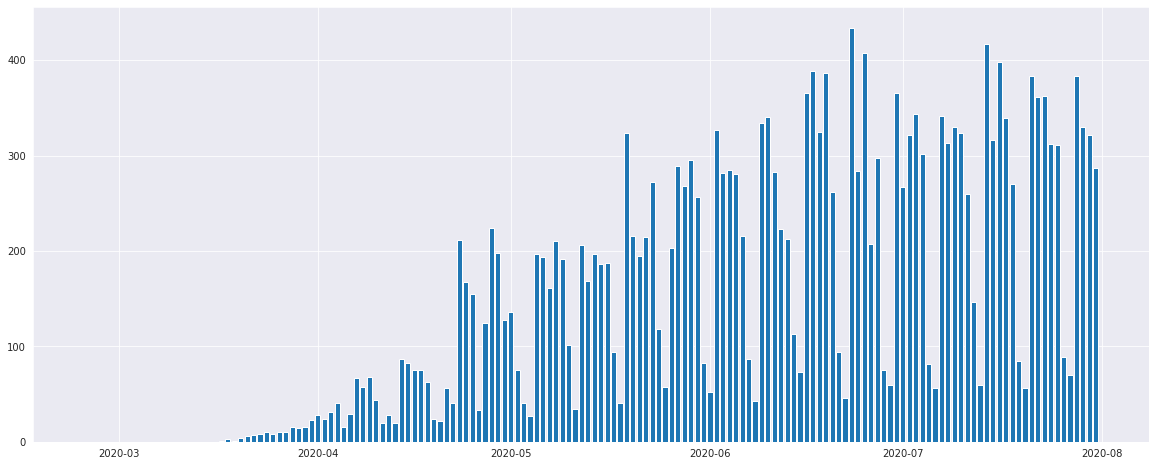

In [ ]:
plot_barra('data', 'novosObitos', dados_sp, None, None, None)

## 4.7: Autocorrelação

Semelhante a correlação de Pearson, a autocorrelação tem como objetivo analisar uma variável com ela mesma utilizando "lags" na comparação, isso é, um delay entre as comparações.

No gráfico visto anteriormente, comparamos a distribuição do número de óbitos com a média móvel de 7 e 14 dias, mas esses períodos de tempo teriam alguma relevância com os dados que temos? Para responder essa questão, devemos analisar o gráfico de autocorrelação da variável:

In [ ]:
from pandas.plotting import autocorrelation_plot

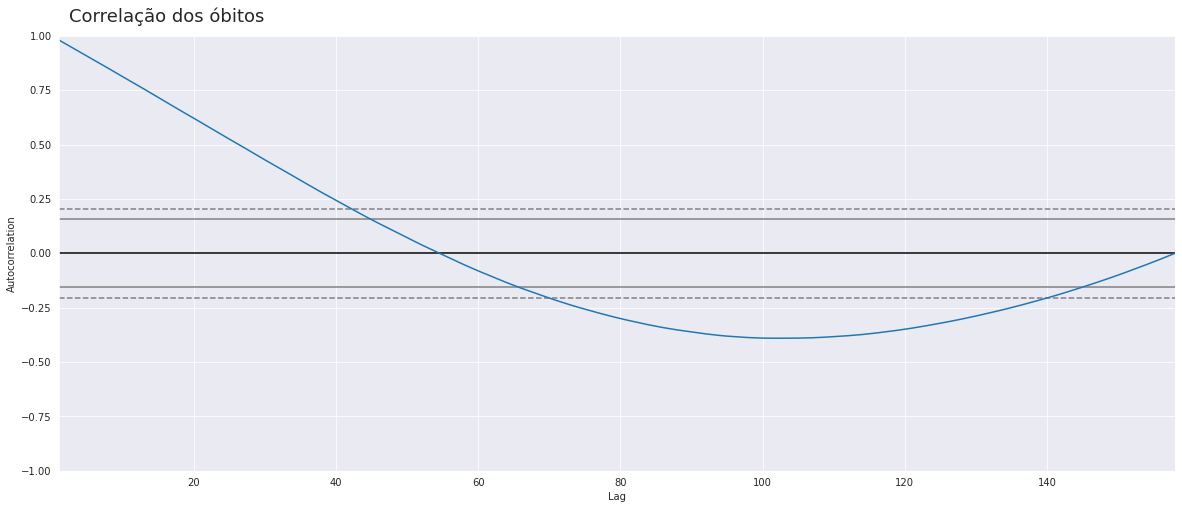

In [ ]:
ax = plt.figure(figsize = (20, 8))
ax.suptitle('Correlação dos óbitos', fontsize = 18, x = 0.20, y= 0.93)
autocorrelation_plot(dados_sp.Obitos)
plt.grid()
ax = ax

Em uma correlação, temos a informação do quão forte duas variáveis estão correlacionadas (de forma positiva ou negativa). Nesse caso, é possível concluir que até o 14° lag (no caso, dia), existe uma autocorrelação forte (maior que 0,75). Sendo assim, a média móvel de 7 e 14 dias são válidas para a análise. 

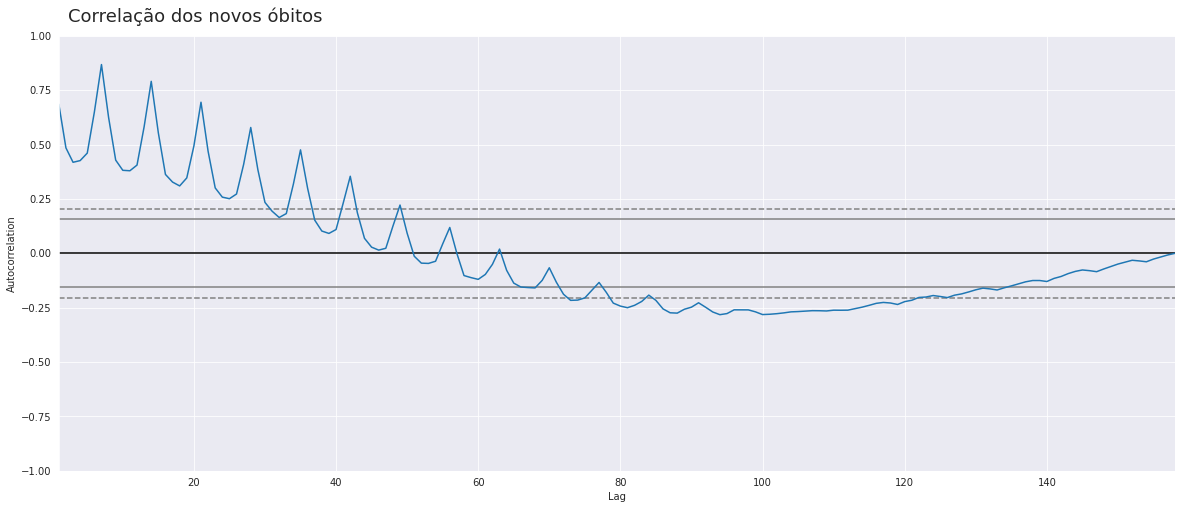

In [ ]:
ax = plt.figure(figsize = (20, 8))
ax.suptitle('Correlação dos novos óbitos', fontsize = 18, x = 0.22, y= 0.93)
autocorrelation_plot(dados_sp.novosObitos)
plt.grid()
ax = ax

É possível encontrar sazonalidade em uma autocorrelação. Para uma melhor visualização, é aplicada uma média móvel (nesse caso, uma média móvel de 7 dias):

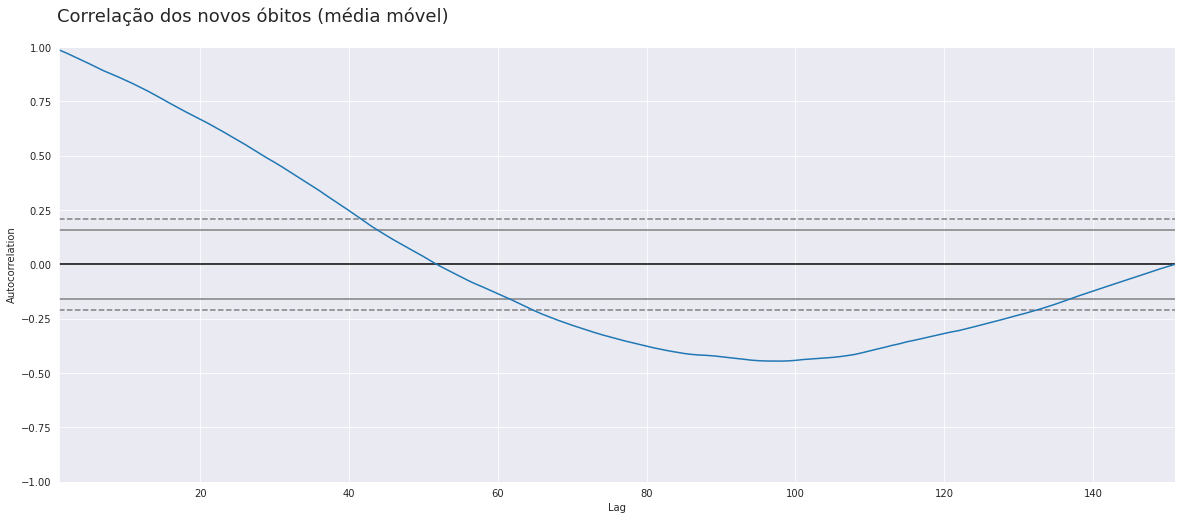

In [ ]:
ax = plt.figure(figsize = (20, 8))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize = 18, x = 0.26, y= 0.95)
autocorrelation_plot(dados_sp.media_obitos7[7:])
plt.grid()
ax = ax

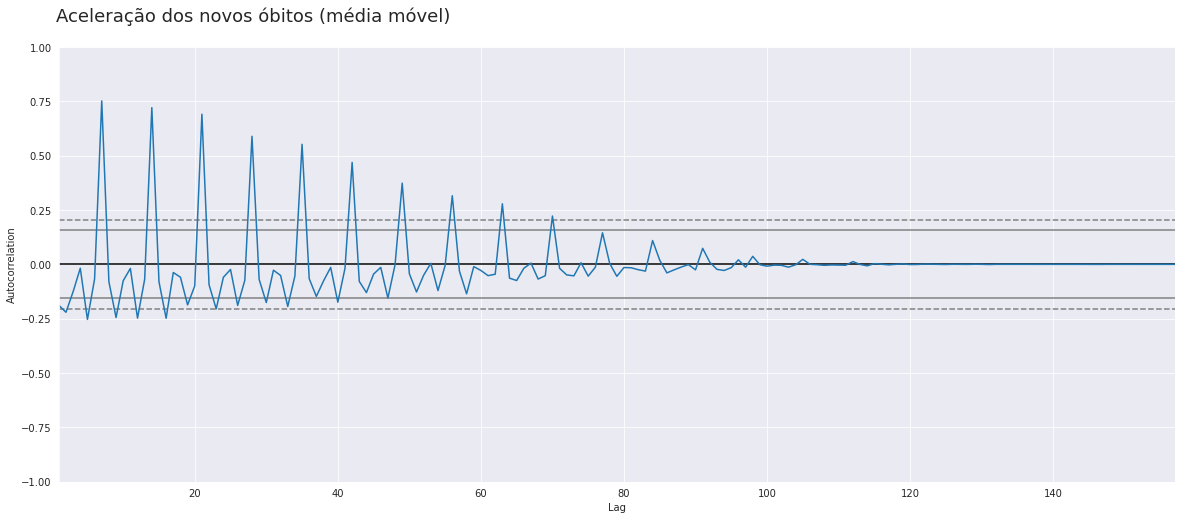

In [ ]:
ax = plt.figure(figsize = (20, 8))
ax.suptitle('Aceleração dos novos óbitos (média móvel)', fontsize = 18, x = 0.26, y= 0.95)
autocorrelation_plot(dados_sp.aceleracao_obitos[1:])
plt.grid()
ax = ax

## 4.8: Comportamento do vírus em função dos dias da semana

In [ ]:
dados_sp['mes'] = pd.to_datetime(dados_sp.data)
dados_sp['dia_da_semana'] = dados_sp.mes.dt.day_name()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracao_casos,aceleracao_obitos,media_obitos7,media_obitos14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [ ]:
dados_sp.dia_da_semana.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
dia_semana = {'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo',
       'Monday':'Segunda'}

In [ ]:
dados_sp.dia_da_semana = dados_sp.dia_da_semana.map(dia_semana)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dados_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracao_casos,aceleracao_obitos,media_obitos7,media_obitos14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Sabado


In [ ]:
grupos_sp = dados_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracao_obitos'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
grupos_sp

,Obitos,novosObitos,aceleracao_obitos
dia_da_semana,,,
Domingo,6846.0,60.0,-95.0
Quarta,6975.0,181.0,-25.0
Quinta,7165.0,190.0,9.0
Sabado,6786.0,155.0,-17.0
Segunda,6887.0,41.0,-20.0
Sexta,7342.0,177.0,-13.0
Terça,6794.0,206.0,175.0


In [ ]:
grupos_sp = grupos_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'])

In [ ]:
grupos_sp

,Obitos,novosObitos,aceleracao_obitos
dia_da_semana,,,
Domingo,6846.0,60.0,-95.0
Segunda,6887.0,41.0,-20.0
Terça,6794.0,206.0,175.0
Quarta,6975.0,181.0,-25.0
Quinta,7165.0,190.0,9.0
Sexta,7342.0,177.0,-13.0
Sabado,6786.0,155.0,-17.0
Domingo,6846.0,60.0,-95.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


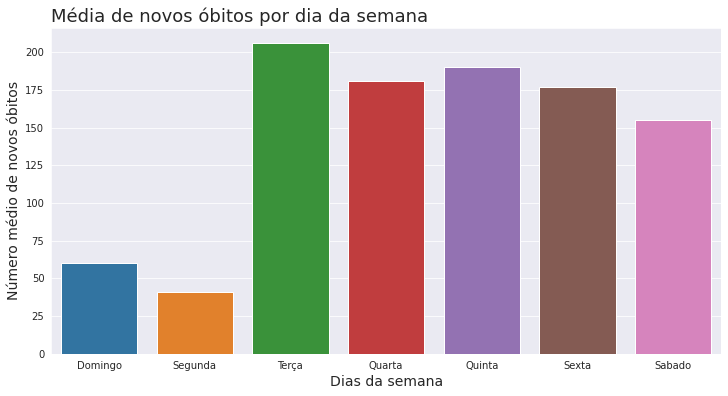

In [ ]:
ax = sns.barplot(grupos_sp.index, grupos_sp.novosObitos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de novos óbitos por dia da semana', fontsize = 18, loc = 'left')
ax.set_xlabel('Dias da semana', fontsize = 14)
ax.set_ylabel('Número médio de novos óbitos', fontsize = 14)
ax = ax

In [ ]:
def criar_feature(df, label = None):
  data = df.copy()
  data['dia_semana'] = data['mes'].dt.dayofweek
  data['mês'] = data.mes.dt.month
  data['dia_mes'] = data.mes.dt.day
  data['semana'] = data['mes'].dt.isocalendar().week
  X = data[['dia_semana', 'mês', 'dia_mes', 'semana']]

  if label:
    y = data[label]
    return X, y
  else:
    return X

In [ ]:
X, y = criar_feature(dados_sp, 'Obitos')

In [ ]:
df_final = pd.concat([X, y], axis = 1)

In [ ]:
df_final.head(10)

,dia_semana,mês,dia_mes,semana,Obitos
0,1,2,25,9,0
2,2,2,26,9,0
4,3,2,27,9,0
6,4,2,28,9,0
8,5,2,29,9,0
10,6,3,1,9,0
12,0,3,2,10,0
14,1,3,3,10,0
16,2,3,4,10,0
19,3,3,5,10,0


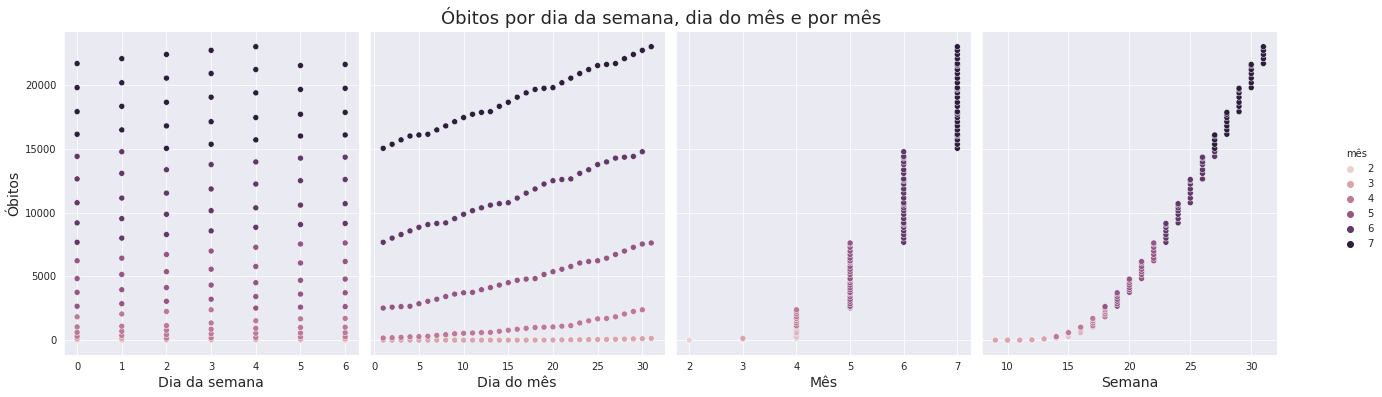

In [ ]:
ax = sns.pairplot(df_final.dropna(), hue = 'mês', x_vars = ['dia_semana', 'dia_mes', 'mês', 'semana'], y_vars = 'Obitos')
ax.figure.set_size_inches(20, 6)
ax.axes[0,0].set_xlabel('Dia da semana', fontsize = 14)
ax.axes[0,1].set_xlabel('Dia do mês', fontsize = 14)
ax.axes[0,2].set_xlabel('Mês', fontsize = 14)
ax.axes[0,3].set_xlabel('Semana', fontsize = 14)
ax.axes[0,0].set_ylabel('Óbitos', fontsize = 14)
plt.suptitle('Óbitos por dia da semana, dia do mês e por mês', fontsize = 18, y = 1.02)
plt.show()